**Задача**: спроектировать дизайн A/B теста, позволяющего оценить эффект от изменения верстки объявлений в разделе Автозапчасти сайта Фарпост - 
вместо списка сделали плиточный вид.

# Смоделируем следующий сценарий:
Существует проблема маленькой конверсии раздела "Автозапчасти" на сайте Фарпост. Посетители не так часто кликают на объявления и выполняют целевое действие подтверждения заказа. Нынешняя конверсия составляет 15% и команда решила попробовать изменить отображение объявлений из списка в плиточный вид. Было бы отлично, если бы конверсия увеличилась на 3% и составила 18%, тогда новый дизайн можно будет считать успешным.

# Детали дизайна нашего эксперимента следующие:

**1. Бизнес проблема:** считаем, что конверсия из посещения раздела "Автозапчасти" в подтверждение заказа недостаточно высока.

**2. Гипотеза:** предполагаем, что изменение верстки объявлений из списка в плиточный вид позволит достичь следующего эффекта:

  **2.1 Больше людей заходят кликнуть на объявление, посмотреть подробнее и оформить заказ.**

**3. Успех эксперимента заключается в:** увеличении конверсии из посещения раздела "Автозапчасти" в покупку.

# Время проведения эксперимента

Зачастую подобные эксперименты длятся 14 дней. Но необходимо понимать, что из-за четко определенных сроков проведения A/B тестирования может сложиться разница в конверсиях между двумя версиями сайта не по той причине, что сайт B лучше сайта A приводит к целевому действию, а по причине того, что пользователи, зашедшие в первый день в раздел "Автозапчасти", имели две недели на совершение покупки, тогда как пользователи, зашедшие в последний день - имели всего один день на покупку. Покупка автозапчастей является достаточно взвешенным решением, так что чтобы избежать влияния фактора "скорость принятия решения" на наши результаты, необходимо рассчитать **окно конверсии**. Для выбора окна конверсии возьмем датасет из открытых источников, содержащий время первого входа на сайт и время совершения покупки (в реальном A/B тестировании это был бы датасет, содержащий время входа на страницу раздела "Автозапчасти" и время подтверждения заказа).

In [21]:
import pandas as pd
import warnings
import locale
warnings.filterwarnings('ignore')

In [23]:
paytime_data = pd.read_csv('payment_window.csv', parse_dates = [2,3], index_col = 0)

In [24]:
paytime_data

,user_id,main_page_viewed_at,order_completed_at,time_to_order
0,959238,2020-11-20 23:55:02.759000+00:00,2020-11-30 02:22:32.759000+00:00,9.102431
1,337366,2020-12-05 23:41:42.244000+00:00,2020-12-12 22:25:52.244000+00:00,6.947338
2,259956,2020-11-20 23:33:53.269000+00:00,2020-11-25 13:08:03.269000+00:00,4.565394
3,534280,2020-11-28 23:44:56.556000+00:00,2020-12-05 10:14:06.556000+00:00,6.436921
4,795121,2020-11-18 23:59:56.236000+00:00,2020-11-27 02:38:16.236000+00:00,8.109954
...,...,...,...,...
9995,240447,2020-11-17 10:06:55.769000+00:00,2020-11-20 12:10:57.435667+00:00,3.086130
9996,862060,2020-11-17 12:06:56.864000+00:00,2020-11-20 14:24:35.197333+00:00,3.095583
9997,798767,2020-11-18 08:55:35.282000+00:00,2020-11-21 11:33:38.615333+00:00,3.109761
9998,967650,2020-11-17 08:13:14.589000+00:00,2020-11-20 12:33:22.922333+00:00,3.180652


In [25]:
locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
paytime_data.dtypes

user_id                  int64
main_page_viewed_at     object
order_completed_at      object
time_to_order          float64
dtype: object

In [26]:
import numpy as np

In [28]:
np.percentile(paytime_data['time_to_order'], 100)

14.263310185185183

In [30]:
np.percentile(paytime_data['time_to_order'], 95) 

7.117476851851854

In [31]:
np.percentile(paytime_data['time_to_order'], 90)

2.864949845679016

14 и 7 дней - слишком долгие окна, чтобы предпринимать решения о покупке в разделе "Автозапчасти", хоть оно и должно быть взвешенным. Будет лучше, если мы потеряем некоторое количество строк данных, но сократим период ожидания покупки. Для этого лучше всего подойдет 90-ый персентиль, он равен трем дням. Таким образом мы не потеряем много данных, но сохраним скорость принятия решения и время проведения эксперимента получится весьма корректным.

In [35]:
perc_90 = round(np.percentile(paytime_data['time_to_order'], 90), 1)
perc_90

2.9

## Построим гистограмму распределения времени между первым посещением раздела и подтверждением заказа

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

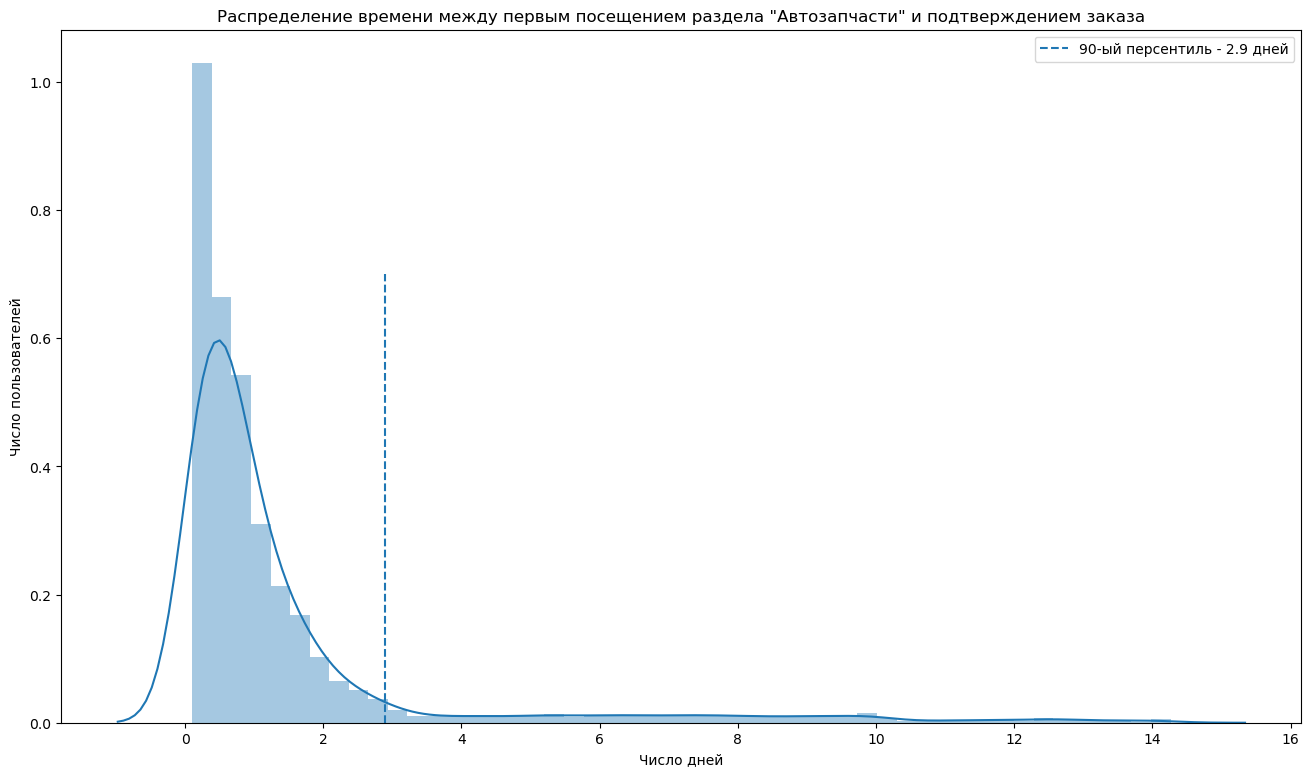

In [40]:
plt.figure(figsize=(16,9))
sns.distplot(paytime_data['time_to_order'])
plt.vlines(perc_90, ymin = 0, ymax = 0.7, linestyles = 'dashed', label = f'90-ый персентиль - {perc_90} дней')
plt.title('Распределение времени между первым посещением раздела "Автозапчасти" и подтверждением заказа')
plt.xlabel('Число дней')
plt.ylabel('Число пользователей')
plt.legend()
plt.show()

Следующая гистограмма дает понять, что большинство пользователей делает свой заказ в первые 3 дня с момента захода на сайт. Значит, для каждого пользователя мы посмотрим дату первого посещения раздела "Автозапчасти" и дату подтверждения заказа. Если пользователь сделал покупку в течение 3 дней, то мы засчитаем эту покупку для подсчета конверсии во время нашего A/B теста. Если пользователь сделал покупку позже, то мы не будем засчитывать эту конверсию.
Таким образом, время проведения эксперимента будет не **14 дней**, как планировалось изначально, а **17 дней** - мы посчитали оптимальное окно конверсии для раздела "Автозапчасти", равное трем дням.

# Дизайн A/B теста

Представим, что мы применили вычисления в предыдущем шаге и теперь знаем, каким должно быть время проведения нашего A/B тестирования с учетом окна конверсии. Перейдем к дизайну A/B теста.

Так как мы не знаем, будет ли плиточный дизайн эффективнее нынешнего, стоит воспользоваться двусторонним тестом (two-tailed test) для проверки.
Пусть p - конверсия нового дизайна, p0 - конверсия старого дизайна. 
Тогда выдвинем для двустороннего теста следующие гипотезы:
H0 (нулевая гипотеза): p = p0
Ha: p != p0



Для нашего теста нам необходимы две группы:

группа control - ей мы будем показывать старый дизайн в виде списка

группа treatment - ей мы будем показывать плиточный дизайн

Нам необходимо иметь две тестовые группы, проходящие одновременно, потому что нам нужно контролировать различные переменные факторы, которые могут повлиять на тестирование: сезонность покупок, появление еще одного конкурента-аггрегатора на дальневосточном рынке и т.д. Все это может негативно повлиять на достоверность результатов тестирования.
Для измерения эффективности нашего тестирования, как мы уже знаем, мы будем использовать **конверсию**. 
Распределим пользователей так:

**0** - пользователь не совершил покупку во время своего посещения сайта.

**1** - пользователь совершил покупку во время посещения.

Стоит помнить, что при реальном тестировании мы бы включали в группу **1** только тех пользователей, кто совершил покупку согласно нашему окну конверсии, что мы расчитали в предыдущем шаге.

## Размер выборки

Чем больше пользовательских сессий мы включим в наш анализ, тем точнее мы рассчитаем коэффиценты конверсии. Чем больше размер выборки, тем выше шанс, что мы сможем выявить разницу между двумя тестовыми группами.

Но с другой стороны чем больше выборка, тем дороже и сложнее будет тестирование, поэтому необходимо посчитать наиболее эффективную выборку для последующего анализа.

Для подсчета размера выборки необходимо использовать мощность анализа, которая основывается на:

**Мощность теста** - вероятность найти разницу между двумя тестовыми группами, когда она действительно существует. Обычно устанавливается как 0.8.

**Alpha-value** - некий устанавливаемый порог. Если значение p-value меньше alpha, то мы отвергаем нашу нулевую гипотезу, а значит показатели нового дизайна отличаются от показателей старого. Поставим как 0.05.

**Эффективность** - разница между конверсиями.

Помним, что команда бы хотела увеличить конверсию с 15% до 18%.

In [48]:
effect_size = sms.proportion_effectsize(0.15, 0.18)   # подсчитываем  эффективный размер на основании наших ожиданий

required_n = sms.NormalIndPower().solve_power( # считаем выборку
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                 

required_n = ceil(required_n)       # округляем                                           

print(required_n)

2399


Значит нам необходимо как минимум 2399 наблюдений для каждой группы. Таким образом мы рассчитали объем трафика, нужный для эффективного анализа нашего эксперимента.

# Сбор данных

В реальном тестировании мы бы получили настоящий датасет с поведением пользователей в разделе Автозапчасти на Фарпосте, но мы будемо использовать найденный в интернете датасет.



In [51]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [53]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


Необходимо отфильтровать лишние случаи

In [54]:
df = df.query('(group == "control" & landing_page == "old_page") | (group == "treatment" & landing_page == "new_page")')

In [55]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,0,145274
treatment,145311,0


Так-то лучше

In [56]:
session_counts = df['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()
print(f'Существует {multi_users} человек появившихся несколько раз в датасете')

Существует 1 человек появившихся несколько раз в датасете


Удалим из датасета лишние данные

In [57]:
users_to_drop = session_counts[session_counts > 1].index

df = df[~df['user_id'].isin(users_to_drop)]
print(f'Обновленный датасет имеет {df.shape[0]} вхождений')

Обновленный датасет имеет 290583 вхождений


Теперь выберем для каждой группы 2399 вхождений из нашего датасета случайным образом.

In [58]:
control_sample = df[df['group'] == 'control'].sample(n=required_n, random_state=23)
treatment_sample = df[df['group'] == 'treatment'].sample(n=required_n, random_state=23)

ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)

In [59]:
ab_test

,user_id,timestamp,group,landing_page,converted
0,887338,2017-01-12 06:53:21.417894,control,old_page,1
1,704149,2017-01-06 08:58:33.492141,control,old_page,0
2,700197,2017-01-16 06:42:26.997856,control,old_page,0
3,756475,2017-01-07 01:58:03.432851,control,old_page,0
4,648976,2017-01-05 10:23:11.573391,control,old_page,0
...,...,...,...,...,...
4793,742383,2017-01-09 06:50:27.430165,treatment,new_page,0
4794,916561,2017-01-22 15:21:08.801980,treatment,new_page,0
4795,842629,2017-01-10 02:53:37.513038,treatment,new_page,0
4796,633278,2017-01-09 19:00:24.573172,treatment,new_page,0


In [60]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       4798 non-null   int64 
 1   timestamp     4798 non-null   object
 2   group         4798 non-null   object
 3   landing_page  4798 non-null   object
 4   converted     4798 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 187.6+ KB


In [61]:
ab_test['group'].value_counts()

group
control      2399
treatment    2399
Name: count, dtype: int64

Теперь можно проанализировать результаты, так как тестовые группы такие, как мы и хотели

## Визуализируем результаты

Посчитаем базовую конверсию

In [62]:
conversion_rates = ab_test.groupby('group')['converted']

std_p = lambda x: np.std(x, ddof=0)              # отклонение
se_p = lambda x: stats.sem(x, ddof=0)            # ошибка

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
group,,,
control,0.123,0.328,0.007
treatment,0.131,0.338,0.007


Выглядит так, что наш новый дизайн повел себя лучше, чем старый. Визуализируем данные.

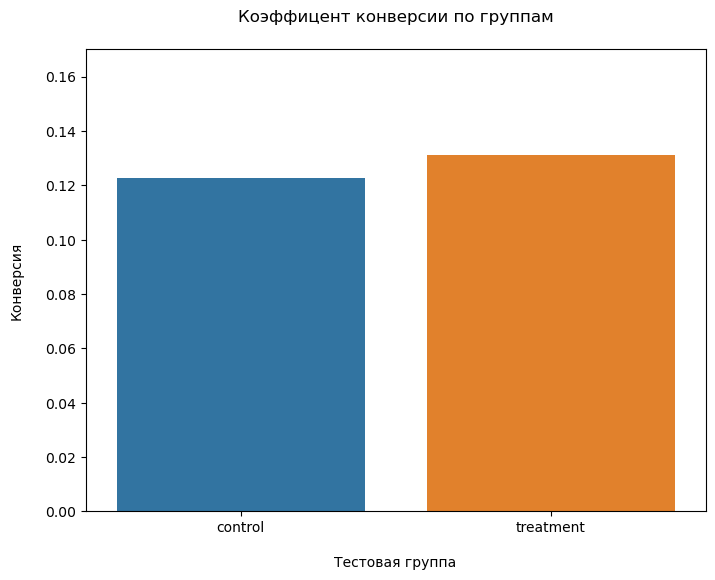

In [63]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Коэффицент конверсии по группам', pad=20)
plt.xlabel('Тестовая группа', labelpad=15)
plt.ylabel('Конверсия', labelpad=15);

Мы можем наблюдать, что результаты нового дизайна лучше, чем старого, но так же известно, что конверсия оригинального дизайна в нашей выборке ниже, чем его настоящая конверсия (12.3 < 15). Это происходит потому, что мы проводим анализ определенной выборки, а не всего датасета пользовательских сессий нашего раздела "Автозапчасти".

## Проверим нашу гипотезу 

In [64]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [65]:
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

In [67]:
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'Доверительный интервал 95% для control: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'Доверительный интервал 95% для treatment: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -0.91
p-value: 0.362
Доверительный интервал 95% для control: [0.109, 0.136]
Доверительный интервал 95% для treatment: [0.118, 0.145]


## Итог

Раз уж наше значение p-value гораздо больше, чем значение alpha, то мы не можем отвергнуть нашу нулевую гипотезу, что означает, что наш новый дизайн не показал других результатов по сравнению со старым дизайном-списком.

Также, взглянув на результаты нашей группы нового дизайна, мы можем заметить, что она включает в себя базовое значение конверсии, но не включает в себя новое увеличенное значение (18%), к чему мы стремились. Это значит, что настоящая конверсия нового дизайна очень близка к конверсии старого дизайна и плиточный вид не будет улучшением старого дизайна раздела Автозапчасти на Фарпосте. Эффекта не будет! 